In [1]:
# -------------------------------
# Step 1: Clone GitHub Repository
# -------------------------------
!git clone https://github.com/joestubbs/coe379L-sp25.git

fatal: destination path 'coe379L-sp25' already exists and is not an empty directory.


In [2]:
# -------------------------------
# Step 2: Set Working Directory
# -------------------------------
import os

dataset_path = "coe379L-sp25/datasets/unit03/Project3"
os.chdir(dataset_path)

damage: 14170 images
damage image size: (128, 128)


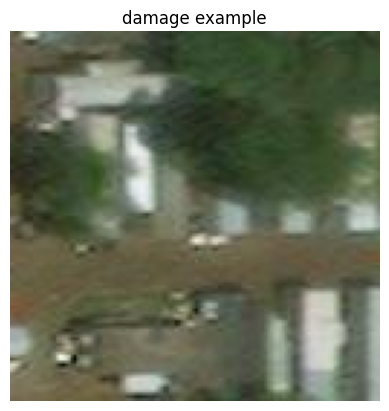

no_damage: 7152 images
no_damage image size: (128, 128)


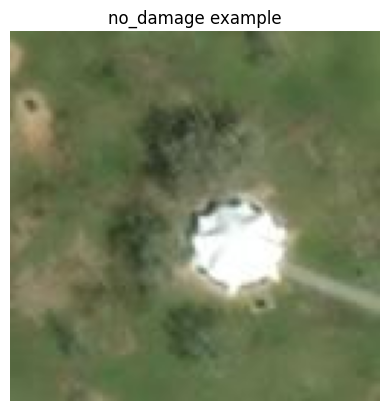

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import random
import os

categories = ["damage", "no_damage"]

for category in categories:
    path = category  # since we're already in the Project3 folder
    if not os.path.exists(path):
        print(f"⚠️ Folder not found: {path}")
        continue

    num_images = len(os.listdir(path))
    print(f"{category}: {num_images} images")

    # Show 1 sample image from each class
    sample_img_path = os.path.join(path, random.choice(os.listdir(path)))
    img = Image.open(sample_img_path)
    print(f"{category} image size: {img.size}")
    plt.imshow(img)
    plt.title(f"{category} example")
    plt.axis('off')
    plt.show()

In [4]:
# -------------------------------
# Step 4: Preprocess the Dataset
# - Resize to (128, 128)
# - Normalize (0-1 range)
# - Label encode (0 for no_damage, 1 for damage)
# -------------------------------
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


IMG_SIZE = (128, 128)

data = []
labels = []

for label, category in enumerate(categories):  # damage = 0, no_damage = 1
    folder = category  # <- FIXED: no more dataset_path
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        try:
            img = load_img(img_path, target_size=IMG_SIZE)
            img = img_to_array(img) / 255.0  # normalize
            data.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Failed to process {img_path}: {e}")

data = np.array(data)
labels = np.array(labels)

print(f"✅ Loaded {len(data)} images")
print(f"🔍 Image shape: {data[0].shape}")

2025-04-10 21:35:12.109758: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-10 21:35:12.160237: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-10 21:35:12.160283: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-10 21:35:12.162994: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-10 21:35:12.173864: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-10 21:35:12.174892: I tensorflow/core/platform/cpu_feature_guard.cc:1

✅ Loaded 21322 images
🔍 Image shape: (128, 128, 3)


In [5]:
# -------------------------------
# Step 5: Split Dataset
# -------------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    data, labels, test_size=0.3, random_state=42, stratify=labels
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (14925, 128, 128, 3)
Validation set: (3198, 128, 128, 3)
Testing set: (3199, 128, 128, 3)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# -------------------------------
# Model 1: Fully Connected ANN
# -------------------------------
ann_model = Sequential([
    Flatten(input_shape=(128, 128, 3)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history_ann = ann_model.fit(X_train, y_train,
                            validation_data=(X_val, y_val),
                            epochs=10, batch_size=32)


Epoch 1/10


2025-04-10 21:35:27.436932: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2934374400 exceeds 10% of free system memory.


467/467 [==============================] - 69s 146ms/step - loss: 1.2309 - accuracy: 0.6391 - val_loss: 0.6381 - val_accuracy: 0.6645
Epoch 2/10
467/467 [==============================] - 66s 140ms/step - loss: 0.6388 - accuracy: 0.6645 - val_loss: 0.6380 - val_accuracy: 0.6645
Epoch 3/10
467/467 [==============================] - 65s 139ms/step - loss: 0.6382 - accuracy: 0.6646 - val_loss: 0.6382 - val_accuracy: 0.6645
Epoch 4/10
467/467 [==============================] - 65s 139ms/step - loss: 0.6400 - accuracy: 0.6646 - val_loss: 0.6380 - val_accuracy: 0.6645
Epoch 5/10
467/467 [==============================] - 64s 137ms/step - loss: 0.6383 - accuracy: 0.6646 - val_loss: 0.6380 - val_accuracy: 0.6645
Epoch 6/10
467/467 [==============================] - 68s 145ms/step - loss: 0.6385 - accuracy: 0.6646 - val_loss: 0.6383 - val_accuracy: 0.6645
Epoch 7/10
467/467 [==============================] - 65s 140ms/step - loss: 0.6385 - accuracy: 0.6646 - val_loss: 0.6381 - val_accuracy: 0.6

In [7]:
# -------------------------------
# Model 2: LeNet-5 (classic)
# -------------------------------
lenet_model = Sequential([
    Conv2D(6, kernel_size=5, activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=2),
    Conv2D(16, kernel_size=5, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(1, activation='sigmoid')
])

lenet_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

history_lenet = lenet_model.fit(X_train, y_train,
                                validation_data=(X_val, y_val),
                                epochs=10, batch_size=32)


Epoch 1/10


2025-04-10 21:46:39.039543: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2934374400 exceeds 10% of free system memory.


467/467 [==============================] - 41s 87ms/step - loss: 0.3643 - accuracy: 0.8468 - val_loss: 0.2628 - val_accuracy: 0.8946
Epoch 2/10
467/467 [==============================] - 40s 85ms/step - loss: 0.2345 - accuracy: 0.9066 - val_loss: 0.2193 - val_accuracy: 0.9034
Epoch 3/10
467/467 [==============================] - 39s 84ms/step - loss: 0.1643 - accuracy: 0.9347 - val_loss: 0.1536 - val_accuracy: 0.9356
Epoch 4/10
467/467 [==============================] - 38s 82ms/step - loss: 0.1259 - accuracy: 0.9529 - val_loss: 0.1283 - val_accuracy: 0.9500
Epoch 5/10
467/467 [==============================] - 38s 81ms/step - loss: 0.0846 - accuracy: 0.9691 - val_loss: 0.1446 - val_accuracy: 0.9475
Epoch 6/10
467/467 [==============================] - 40s 86ms/step - loss: 0.0537 - accuracy: 0.9816 - val_loss: 0.1566 - val_accuracy: 0.9459
Epoch 7/10
467/467 [==============================] - 38s 81ms/step - loss: 0.0357 - accuracy: 0.9878 - val_loss: 0.1801 - val_accuracy: 0.9396
Epo

In [8]:
# -------------------------------
# Model 3: Alernate-LeNet-5 (from paper)
# -------------------------------
alt_lenet_model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=2),
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(1, activation='sigmoid')
])

alt_lenet_model.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

history_alt_lenet = alt_lenet_model.fit(X_train, y_train,
                                        validation_data=(X_val, y_val),
                                        epochs=10, batch_size=32)


Epoch 1/10


2025-04-10 21:53:23.590251: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2934374400 exceeds 10% of free system memory.


467/467 [==============================] - 72s 152ms/step - loss: 0.3798 - accuracy: 0.8368 - val_loss: 0.2277 - val_accuracy: 0.9081
Epoch 2/10
467/467 [==============================] - 70s 149ms/step - loss: 0.1895 - accuracy: 0.9249 - val_loss: 0.1940 - val_accuracy: 0.9246
Epoch 3/10
467/467 [==============================] - 74s 159ms/step - loss: 0.1318 - accuracy: 0.9489 - val_loss: 0.1295 - val_accuracy: 0.9490
Epoch 4/10
467/467 [==============================] - 71s 152ms/step - loss: 0.1008 - accuracy: 0.9630 - val_loss: 0.1455 - val_accuracy: 0.9406
Epoch 5/10
467/467 [==============================] - 74s 159ms/step - loss: 0.0693 - accuracy: 0.9747 - val_loss: 0.1579 - val_accuracy: 0.9453
Epoch 6/10
467/467 [==============================] - 69s 147ms/step - loss: 0.0539 - accuracy: 0.9819 - val_loss: 0.1703 - val_accuracy: 0.9450
Epoch 7/10
467/467 [==============================] - 73s 155ms/step - loss: 0.0389 - accuracy: 0.9860 - val_loss: 0.1898 - val_accuracy: 0.9

In [9]:
# -------------------------------
# Evaluation (Compare all three)
# -------------------------------
def evaluate_model(model, name):
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} Accuracy on Test Set: {acc:.4f}")

evaluate_model(ann_model, "ANN")
evaluate_model(lenet_model, "LeNet-5")
evaluate_model(alt_lenet_model, "Alternate-LeNet-5")


ANN Accuracy on Test Set: 0.6646
LeNet-5 Accuracy on Test Set: 0.8793
Alternate-LeNet-5 Accuracy on Test Set: 0.9547


In [10]:
import os
os.makedirs("model", exist_ok=True)

In [11]:
alt_lenet_model.save("model/best_model.h5")

/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from io import BytesIO
from PIL import Image

app = FastAPI()

model = load_model("model/best_model.h5")

@app.get("/summary")
def summary():
    return {
        "model_name": "Alternate LeNet-5 CNN",
        "input_shape": [128, 128, 3],
        "output": ["damage", "no_damage"]
    }

@app.post("/inference")
async def inference(file: UploadFile = File(...)):
    contents = await file.read()
    image = Image.open(BytesIO(contents)).resize((128, 128))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    pred = model.predict(image)[0][0]
    label = "damage" if pred >= 0.5 else "no_damage"
    return JSONResponse(content={"prediction": label})


ModuleNotFoundError: No module named 'fastapi'